
# Representación numérica de textos
En la mayoría de técnicas comúnmente utilizadas en Text Mining y NLP es necesario representar los textos en forma de vectores numéricos para que puedan ser procesados por modelos estadísticos o modelos de aprendizaje automático. Existen diferentes formas de representar el texto de esta manera, todas de ellas consisten en mapear la información a un espacio vectorial, numérico, aunque difieren en la manera de modelar los datos.

Por una parte, nos encontramos estrategias para representar documentos completos en el espacio vectorial. Estas estrategias se basan en construir una matriz de términos y documentos, que representan el contenido del texto en vectores de manera que puedan ser utilizados como fuente de datos de entrada para tareas de clasificación, topic modelling o búsqueda de información. 


Por otra parte, existen estrategias para representar los documentos a nivel de palabra. Es decir, que cada token del vocabulario tenga asociada un vector específico. Estas estrategias, comúnmente denominadas como embeddings, permiten capturar la semántica de los términos y realizar de forma muy competente tareas más complejas como la extracción y linkeo de entidades, aunque también pueden ser utilizadas para otro tipo de tareas. 






## 1. Representación numérica de documentos

En este notebook vamos a aprender a representar numéricamente documentos a través de los métodos de representación Bag Of Words (BoW) y TF-IDF.


Para este ejercicio trabajaremos con un corpus muy sencillo, para visualizar bien los resultados:

In [ ]:
corpus = ["yo quiero agua",
          "yo quiero cocacola",
          "yo quiero agua y un agua",
          "yo no quiero vino",
          "yo quiero un entrecot"]

Vamos a tokenizar cada una de las frases, para trabajar comodamente más adelante:

In [ ]:
corpus_tok = [i.split() for i in corpus]  #Corpus conocido y sencillo, podemos dividir palabras con split()
corpus_tok

### Bag of Words
Como hemos visto anterioremente, Bag Of Words es uno de los modelos de representación de texto más intuitivos. Para implementarlo, se construye un vocabulario de tamaño N con los tokens únicos del corpus de trabajo, para despues representar cada documento con un vector del mismo tamaño en el que cada elemento será el nº de veces que aparece el token en cuestión en el documento.



En primer lugar, construimos el vocabulario que se utilizará para representar nuestro corpus:

In [ ]:
# El vocabulario de nuestro corpus son los tokens únicos utilizados en nuestro conjunto de documentos
import itertools
import numpy as np

all_tokens = itertools.chain(*corpus_tok)
vocab = sorted(set(all_tokens))

print("Nuestro vocabulario contiene {} tokens. Que son: {}".format(len(vocab),vocab))

Cada uno de los documentos del corpus estará representado por un vector de 9 elementos. El elemento 0 representará la presencia del token agua en el documento, el elemento 1 representará la presencia de "cocacola" en el documento... etc

A continuación, vamos a construir esos vectores:

In [ ]:
import collections
# Creamos un vector de salida
doc_vectors = list()
# Iteramos en cada uno de los documentos del corpus
for doc in corpus_tok:
  # Contamos las ocurrencias de cada uno de los tokens. Counter devuelve un diccionario
  counter_doc = collections.Counter(doc)
  # Creamos el vector que representará al documento
  doc_vec = list()
  # Iteramos por los términos del voabulario
  for word in vocab:
    # Si el término está en el diccionario de conteo, introducimos el valor en
    # esa posición del vector. Si no está, introducimos un 0
    if word in counter_doc:
      doc_vec.append(counter_doc[word])
    else:
      doc_vec.append(0)
  # Añadimos al vector de salida el vector del documento
  doc_vectors.append(doc_vec)

In [ ]:
for frase, vector in zip(corpus, doc_vectors):
  print("La frase '{}' está representada por el vector {}".format(frase, vector))

En Bag Of Words: 

- Los términos que aparecen varias veces en el documento tienen un número mayor, lo que se puede traducir en que esos términos (caracteristicas) tienen un mayor peso en el documento.
- Si un término ocurre muchas veces en todos los documentos, tendrá gran importancia en cada uno de ellos, a pesar de que no será útil para clasificar o agrupar textos.


El método de representación TF-IDF intenta precisamente  compensar este efecto mediante la aplicación de una penalización a palabras comunes en muchos documentos.

### TF-IDF  (intuición)


Para realizar los cáculos de forma más eficiente generaremos un diccionario que asocie a cada una de las palabras de nuestro corpus un índice numérico.


Para calcular TF-IDF realizaremos los siguientes pasos:

1. Calcular el Term Frequency (TF). Que se calcula como:
  $$TF(w) = n_{w-in-d} / N_d$$

Anteriormente hemos calculado para cada documento el número de veces que aparecía cada token del vocabulario. Para calcular el TF bastaría con dividir cada uno de los elementos del vector con la suma total de tokens de cada documento.


2. Calcular el componente Inverse-Document Frequency (IDF). Que se calcula como:
$$ IDF(w) = ln(N/n_w)$$

donde n_w  es el número de documentos que contiene el token w y N es el número total de documentos. 
En el código incluimos una versión simplificada, para simplificar el código, en el que n_w es el número de veces que el token aparece 


En primer lugar generamos una función que permita calcular el número de vees que un token aparece en un documento d enuestro corpus.

Despues, uniríamos ambas expresiones para calcular el TF-IDF de una frase (las siguientes celdas son de pseudocódigo):



```python

def tf_idf_calc(doc, N_corpus):
  # Generamos vector salida
  tf_idf_vec = np.zeros((len(vocab),))
  for word in doc:
    # Calculamoes el valor tf para el token en cuestion
    tf = TF_calc(doc, word)
    # Calculamos el valor idf para el token en cuestion
    idf = idf_calc(doc, N_corpus)

    tf_idf = tf * idf
    tf_idf_vec[index_dict[word]] = tf_idf 
  return tf_idf_vec
```



Y lo aplicaríamos a todo el corpus:




```python
#TF-IDF Encoded text corpus
tf_idf_result = []
for sent in corpus_tok:
    vec = tf_idf_calc(sent,len(corpus_tok))
    tf_idf_result.append(vec)
```



### Cálculo con scikit-learn




Aunque hemos mostrado una manera de aplicar el BoW y Tf-IDF a un corpus de documentos. Existen varias modificaciones que pueden mejorar los resultados (modificaciones en el cálculo de la componente IDF, por ejemplo). Además, las librerías de ML están preapradas para transformar documentos de forma más inmedianta, eficiente e incorporando funciones que pueden ser de utilidad


En scikit-learn podemos utilizar distintas funciones para obtener el vocabulario de un corpus de documentos. Ambas están presentes dentro del módulo feature_extraction.text y son [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y  [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer). 
Vamos a crear un objeto con cada una de esas clases para introducir nuestro corpus y extraer el vocabulario.


**Tanto las funciones CountVectorizer como TfidfVectorizer cuentan con muchos parámetros personalizables. Algunos de los más relevantes son:**


*   *strip_accents*: Elimina los acentos en codificación ascii o unicode. Por defecto es None. Es preferible hacer una gestión de acentos previas.
*   *lowercase*: Transforma todos los caracteres a minúsculas antes de hacer la tokenización.
*   *tokenizer*: Utiliza un tokenizador específico. Se puede utilizar una de NLTK o de Spacy(computacionalmente menos eficiente).
*   *stop_words*: Si se pone el valor "english" eliminara la lista de stop_words definida en scikit-learn. Se puede utilizar la lista de stopwords de otras librerías o definir unas propias.
*   *ngram_range*: Cálculo de n-gramas en el proceso. Mediante la tubla (min_n, max_n) se pueden incorporar n-gramas al cálculo de la matriz tfidf.
*   *max_df*: Valor por defecto 1.  Ignora los tokens (o n-gramas) que aparecen en más del X % de documentos cuando es menor de 1. Si max_df es mayor que uno se ignorarán los términos que aparecen en más de X documentos.
*   *min_df*: Valor por defecto 1. Ignora los tokens que aparecen  en menos del X % de los documentos. Siendo X el valor de X. (0.01 = 1%, por ejemplo)
*   *max_features*: Máximas características que devuelve la función TfidfVectorizer. Valor mayor que 1. Representa las caracaterísticas más importantes (las más repetidas o comunes) Esto es muy interesante para no sobreentrenar el sistema.
*   *norm*: Valores "l1" y "l2", por defecto "l2". Normaliza los valores entre 0 y 1.
*   *use_idf*: Habilita el uso del inverse-document frequency en la función. Por defecto es True.
*   *smooth_idf*: Suaviza los pesos de IDF sumando una unidad a cada frecuencia. Es muy importante para evitar divisiones por cero.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text

# Creamos los objetos
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(norm=None, smooth_idf=False) # Re-escribimos los valores por defecto para tener el tf-idf básico

# Hacemos Fit con nuestro corpus
count_data = count_vectorizer.fit(corpus)
tfidf_data = tfidf_vectorizer.fit(corpus)


In [ ]:
# Obtenemos los vocabularios de dos formas:
print("COUNT VECTORIZER")
print("Obtenemos un dictionario que mapea las palabras con su posición en el vector del vocabulario")
print(count_data.vocabulary_)
print("Obtenemos el vocabulario en si mismo como una lista")
print(count_data.get_feature_names_out())
print("Numero de características:")
print(len(count_data.get_feature_names_out()))

In [ ]:
# Obviamente, dado que hemos utilizado el mismo corpus, obtenemos el mismo resultado con el tfidf_vectorizer.
print("\n\n TF-IDF VECTORIZER")
print("Obtenemos un dictionario que mapea las palabras con su posición en el vector del vocabulario")
print(tfidf_data.vocabulary_)
print("Obtenemos el vocabulario en si mismo como una lista")
print(tfidf_data.get_feature_names_out())
print("Numero de características:")
print(len(tfidf_data.get_feature_names_out()))

Si imprimimos el objeto tfidf_data podemos ver la configuración de los parámetros de TfidfVectorizer:

In [ ]:
tfidf_data

A continuación se muestra el resultado de transformar nuestro corpus con lso métodos de scikit-learn. El `CountVectorizer` mostrará el conteo de veces que una palabra del vocabulario está presente dentro del documento, el `TfidfVectorizer` mostrará el resultado con la métrica TF-IDF mostrada en los apuntes.

In [ ]:
# Resultado del CountVectorizer
count_data_result = count_data.transform(corpus).toarray()
print(count_data_result)

In [ ]:
# Resultado del TfidfVectorizer
tfidf_data_result = tfidf_data.transform(corpus).toarray()
print(tfidf_data_result)

Vamos a mostrar los resultados con seaborn para que se vean mejor. Importante mencionar que esto se puede hacer cuando el vocabulario es muy reducido, si no podría ocasionar problemas en la memoria.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
# Figura CountVectorizer
sns.heatmap(count_data_result, annot=True,cbar=False,
            xticklabels=count_data.get_feature_names_out(),
            yticklabels = ["Frase 1", "Frase 2", "Frase 3","Frase 4", "Frase 5"])



In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(tfidf_data_result, annot=True,cbar=False,
            xticklabels=tfidf_data.get_feature_names_out(),
            yticklabels = ["Frase 1", "Frase 2", "Frase 3","Frase 4", "Frase 5"])

### Uso de preprocesadores externos a scikit-learn




En primer lugar, dado que vamos a utilizar spacy, instalaremos la librería y el modelo:

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm
!python -m spacy download en_core_web_sm

Importamos las librerías y creamos el objeto "nlp" para procesar los textos




In [ ]:
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()

Guardamos las stop words de Spacy en una variable llamada "stop_words". También cogemos los tokens considerados símbolos de punctuación en la variable "punctuations":

In [ ]:
import string
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
stop_words = spacy_stopwords
punctuations=string.punctuation

Generamos una función "spacy_tokenizer" que:

In [ ]:
def spacy_tokenizer(sentence):
    # Pasamos la frase por el objeto nlp para procesarla
    mytokens = nlp(sentence)

    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Quitamos las stopwords y los signos de puntuacion
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # devolver una lsita de tokens
    return mytokens

Utilizamos esa función como tokenizador en TfidfVectorizer:


In [ ]:
tfidf_vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, tokenizer = spacy_tokenizer) # Re-escribimos los valores por defecto para tener el tf-idf básico
tfidf_data = tfidf_vectorizer.fit(corpus)

In [ ]:
print("\n\n TF-IDF VECTORIZER")
print("Obtenemos un dictionario que mapea las palabras con su posición en el vector del vocabulario")
print(tfidf_data.vocabulary_)
print("Obtenemos el vocabulario en si mismo como una lista")
print(tfidf_data.get_feature_names_out())
print("Numero de características:")
print(len(tfidf_data.get_feature_names_out()))

**Ejercicio**: 

Queremos transformar nuestro dataset de noticias con las siguientes especificaciones:
 - Transformar los primeros 3000 documentos 
 - Se utilice idf y el valor de norm por defecto.
 - Se utilice la función de preprocesado de spacy utilizada anteriormente
 - Se consideren unigramas, bigramas, trigramas
 - El vectorizador no debe considerar los elementos que aparezcan en menos del 5% de documentos.

In [ ]:
# Dataset de noticias
!wget "https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/news_summary.csv"

--2023-05-06 11:36:45--  https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/news_summary.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/news_summary.csv [following]
--2023-05-06 11:36:45--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/news_summary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11896415 (11M) [text/plain]
Saving to: ‘news_summary.csv’

news_summary.csv    100%[===================>]  11.34M  --.-KB/s    in 0.05s   

2023-05-06 11:36:46 (228 MB/s) - ‘news_summary.csv’ saved [11896415/11

In [ ]:
import pandas as pd
news_summary = pd.read_csv('../content/news_summary.csv', encoding='latin-1')
news_subset = news_summary["text"].to_list()[0:3000]

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stop_words = spacy_stopwords
punctuations=string.punctuation

In [ ]:
def spacy_tokenizer(sentence):
    # Pasamos la frase por el objeto nlp para procesarla
    mytokens = nlp(sentence)

    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Quitamos las stopwords y los signos de puntuacion
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Quitamos números:
    mytokens = ['' if word.isdigit() else word for word in mytokens  ]
    # devolver una lsita de tokens
    return mytokens

In [ ]:
tfidf_vect = TfidfVectorizer(lowercase = False, stop_words = None, 
                             ngram_range = (1,3), use_idf = True, smooth_idf = True,
                             norm = "l2", min_df=0.05, tokenizer=spacy_tokenizer)
tfidf_data = tfidf_vect.fit(news_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tfidf_data_t = tfidf_data.transform(news_subset)

In [ ]:
tfidf_data_t

<3000x56 sparse matrix of type '<class 'numpy.float64'>'
	with 14828 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_data.get_feature_names_out()

array(['', ' ', ' year', ' year old', '...', 'accord', 'accuse', 'actor',
       'add', 'allegedly', 'arrest', 'ask', 'case', 'chief', 'claim',
       'come', 'country', 'court', 'crore', 'day', 'delhi', 'early',
       'far', 'film', 'find', 'follow', 'friday', 'government', 'high',
       'include', 'india', 'indian', 'lakh', 'like', 'man', 'minister',
       'monday', 'month', 'mumbai', 'new', 'notably', 'official', 'old',
       'party', 'people', 'police', 'president', 'report', 'reportedly',
       'state', 'time', 'tuesday', 'use', 'woman', 'year', 'year old'],
      dtype=object)

### Diferencias entre BoW y TF-IDF


Hasta el momento hemos visto diferente maneras de realizar la representación de documentos utilizando el método BoW y TF-IDF. 
Sin embargo, ¿Qué implica realmente utilizar un método u otro? 

La clave de TF-IDF es su penalización de palabras comunes en todos los documentos. Para ver su efecto, en este apartado vamos a:
1. Descargar un conjunto de documentos de wikipedia
2. Preprocesarlos
3. Mostrar los 10 términos más importantes para BoW y Tf-IDF, y ver las diferencias

En primer lugar importanmos y descargamos las librerías que utilizaremos


In [ ]:
!pip install wikipedia
import wikipedia
import spacy
import collections
import math
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text
import string
import numpy as np
import re

nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stop_words = spacy_stopwords
punctuations=string.punctuation
RE_WHITESPACE = re.compile(r"\s+")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=0e0d226ce4f975c59c01a2896b7f3454e51aaabf94e5c6d76899e1b5f919ac76
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


Definimos una función de procesado similar a la anteriormente definida. En este caso eliminarmos los números (no los sustitumos por un caracter vacío). Además, eliminamos posibles espacios extras despues del proceso de tokenización

In [ ]:
def spacy_tokenizer(sentence):
    # Pasamos la frase por el objeto nlp para procesarla
    mytokens = nlp(sentence)

    mytokens = [ word.text.lower()   if word.pos_ == 'PRON' or word.lemma_ == '-PRON-' else word.lemma_.lower() for word in mytokens]
  
    # Lematizamos los tokens y los convertimos  a minusculas
 #   mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Quitamos las stopwords y los signos de puntuacion
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Quitamos números:
    mytokens = [word  for word in mytokens if not word.isdigit()]
    # Remove extra spaces
    mytokens = [token.strip() for token in mytokens]
    # devolver una lsita de tokens
    return mytokens


Vamos a descargar el texto de descripción de varios guitarristas históricos. Para ello definiremos una lista de strings con sus nombres y los obtendremos utilizando la función "page" de la librería wikipedia. 


In [ ]:
pages =  [
  "Brian May","jimmy page","eddie van halen","david gilmour",
  "Jeff Beck","mark knopfler","Billy Gibbons","Carlos Santana", 
  "Stevie Ray Vaughan","BB king","Buddy Guy","Albert King","Rory Gallagher",
  "Joe Satriani", "jimi hendrix","George Harrison"
    ]
documentes = [RE_WHITESPACE.sub(" ",wikipedia.page(page, auto_suggest=False).content).strip() for page in pages]

Calculamos y entrenamos vectorizadores TFIDF y BoW (CountVectorizer) para el corpus descargado y preprocesado:

In [ ]:
tfidf_vect = TfidfVectorizer(lowercase = False, stop_words = None, use_idf = True, smooth_idf = False,
                             norm = "l2", tokenizer=spacy_tokenizer)
count_vect = CountVectorizer(lowercase = False, stop_words = None, tokenizer=spacy_tokenizer)

tfidf_data = tfidf_vect.fit(documentes)
count_data = count_vect.fit(documentes)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Generamos funciones para obtener las palabras más importantes del vectorizador:


In [ ]:
tfidf_feature_names = np.array(tfidf_data.get_feature_names_out())
count_feature_names = np.array(count_data.get_feature_names_out())

def get_top_vect_words(response, top_n=2,feature_name_array=tfidf_feature_names):
  # De la respuesta del vectorizador, cogemos los datos en bruto del array, los ordenamos
  # de mayor a menor y cogemos los índices de los top_n terminos. Que se seleccionarán del 
  # los nombres de las caracteristicas (tokens) del vectorizador.
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_name_array[response.indices[sorted_nzs]]
  

Generamos está función para mostrar los 10 términos más importantes de un documento vectorizado con TF-IDF y BoW para ver sus diferencias. 

In [ ]:
def show_doc_results(doc,top_n):
  responses_tfidf = tfidf_vect.transform([doc])
  responses_count = count_vect.transform([doc])
  most_frequent = list(get_top_vect_words(responses_count,top_n,count_feature_names))
  tfidf = list(get_top_vect_words(responses_tfidf,top_n,tfidf_feature_names))
  print("Tokens más frecuentes: {}".format(most_frequent))
  print("Tokens con mayor TF-IDF: {}".format(tfidf))

In [ ]:
for i in range(0, len(pages)):
  print(pages[i])
  show_doc_results(documentes[i],10)

Brian May
Tokens más frecuentes: ['queen', 'guitar', 'album', 'use', 'band', 'rock', 'song', 'work', 'perform', 'tour']
Tokens con mayor TF-IDF: ['queen', 'guitar', 'badger', 'mercury', 'animal', 'lambert', 'album', 'use', 'band', 'imperial']
jimmy page
Tokens más frecuentes: ['page', 'zeppelin', 'guitar', 'play', 'led', 'album', 'use', 'record', 'session', 'band']
Tokens con mayor TF-IDF: ['page', 'zeppelin', 'led', 'guitar', 'play', 'plant', 'album', 'yardbirds', 'use', 'record']
eddie van halen
Tokens más frecuentes: ['van', 'halen', 'guitar', 'eddie', 'band', 'later', 'play', 'use', 'album', 'solo']
Tokens con mayor TF-IDF: ['halen', 'van', 'guitar', 'eddie', 'evh', 'wolfgang', 'bertinelli', 'gene', 'valerie', 'pasadena']
david gilmour
Tokens más frecuentes: ['gilmour', 'guitar', '–', 'pink', 'vocal', 'floyd', 'album', 'david', 'release', 'use']
Tokens con mayor TF-IDF: ['gilmour', 'pink', 'floyd', '–', 'guitar', 'vocal', 'barrett', 'steel', 'strat', 'album']
Jeff Beck
Tokens más f

Observar diferencias de palabras muy comunes en documentos de guitarristas como "guitar", "release","play" o "album". En BoW aparecen como términos muy importantes porque son comunes en este tipo de documentos. Sin embargo, al calcular el TF-IDF, como estos términos aparecen en muchos documentos su importancia se ve disminuida.


# Representación numérica de palabras


También se puede hacer una representación de un documento obteniendo una representación de los vectores de las palabras que lo componen, y haciendo algún tipo de combinación sobre éstas (suma, concatenación..).

En este caso presentaremos el One Hot Encoding y los word embeddings.

## One-hot encoder


Probablemente sea la técnica más elemental para representar datos textuales numéricamente. En este modelo de representación cada palabra del vocabulario se representa mediante un vector único en el que cada posición del vector representa una palabra del vocabulario, siendo 0 todos los valores menos el índice del token al que representa el vector. 

En este caso, trabajaremos con el método [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) de Scikit-learn.

En primer lugar, es necesario obtener un índice único para cada una de las palabras de nuestro vocabulario. 

Podemos hacerlo de forma manual o utilizando un LabelEncoder de scikit-learn:

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(vocab)

for elem, index in zip(vocab, integer_encoded): 
  print("Al token `{}` del vocabulario se le ha asignado el índice {}".format(elem,  index))


Una vez asignados estos índices, los utilizaremos para crear un vector único de tamaño del vocabulario. 

Para ello, utilizarmeos el método OneHotEncoder:

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

Cambiamos las dimensiones del vector de índices, y los transformamos utilizando el onehot_encoder:

In [ ]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

for elem, index in zip(vocab, onehot_encoded): 
  print("Al token `{}` del vocabulario se le ha asignado el onehot vector: {}".format(elem,  index))

Después de definir esto podemos generar funciones para transformar un conjunto de tokens a su versión one-hot. Así como el paso inverso. 

In [ ]:
def using_to_categorical(doc,label_encoder, onehot_encoder):
    # Transformamos los tokens a índices
    data = label_encoder.transform(doc)
    # Adaptamos los indices al formato adecuado
    data = data.reshape(len(data), 1)
    # Les aplicamos one hot encoder
    encoded = onehot_encoder.transform(data)
    return encoded


def invert_encoding(vectores_onehot,label_encoder):
    inverted = label_encoder.inverse_transform(list(np.argmax(vectores_onehot,axis=1)))
    return list(inverted)

Utilicemos las funciones:

In [ ]:
documento_ejemplo = "yo quiero agua".split()
documento_ejemplo

In [ ]:
a_hot_enc=using_to_categorical(documento_ejemplo,label_encoder, onehot_encoder)
a_hot_enc

In [ ]:
invert_encoding(a_hot_enc,label_encoder)

## Embeddings

Los embeddings son una técnica de modelización de lenguaje que permite representar palabras mediante vectores densos (*dense vectors*), de menor tamaño que los obtenidos tras _one-hot enconding_, y que además tienen capacidad de representar ontenido semántico. 

A lo largo del tiempo han aparecido diferentes formas de obtener estos embeddings. Pero en este curso aprendermeos a utilizar y a entrenar embeddings estáticos, especificamente word2vec, utilizando la librería [gensim](https://radimrehurek.com/gensim/models/word2vec.html). Hay que mencionar que los actuales embeddings contextuales, como Elmo o BERT, serán utilizados en el futuro para poder mostrar su uso, que en esencia es similar al del embedding estático. 

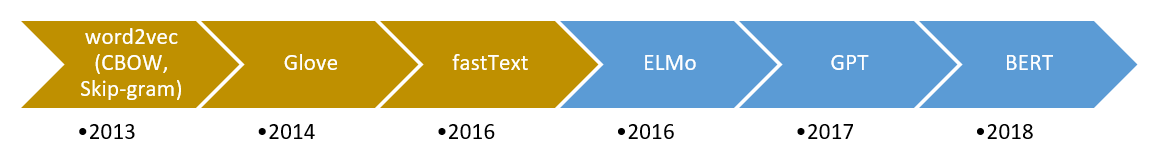

### Carga de embeddings pre-entrenados con ``gensim``






Los embeddings suelen ser entrenados con grandes conjuntos de datos y suele ser costoso su entrenamiento a nivel temporal. Por ese motivo, una de las posibilidades cuando se trabaja con embeddings, es la búsqueda de recursos ya entrenados con textos similares a los que vayamos a trabajar (como contenido de noticias o redes sociales), y utilizarlo para representar nuestros documentos. 


Cuando se busca este tipo de recurso es evidente la influencia anglosajona en el desarrollo de las tecnologías del lenguaje, ya que la mayoría de los recursos se encuentran en este idioma y son fácilmente aplicables desde las librerías de NLP más comunes, en este caso Gensim. Si se quieren utilizar recursos en otros idiomas, hay que buscarlos en repositorios externos para descargarlos manualmente y cargarlos en la librería en cuestión. 

Aunque en este notebook trabajaremos exclusivamente con Gensim, este problema de acceso a recursos se está viendo parcialmente solventado con el incremento de popularidad de librerías como [Hugginface](https://huggingface.co/models) que favorecen el intercambio de recursos en múltiples lenguas


#### Carga de pre-trained embeddings de gensim


La librería Gensim cuenta con un conjunto de embeddings pre-entrenados accesibles desde la propia librería mediante una API.

Para acceder a estos modelos basta con utilizar el comando ```gensim.downloader.info()```, que nos permitirá ver la lista de modelos disponibles:

In [ ]:
import gensim.downloader as api
print("Este es el listado de modelos disponibles en Gensim: \n {}".format(list(api.info()["models"].keys())))


Este es el listado de modelos disponibles en Gensim: 
 ['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Se puede observar que no sólo hay embeddings word2vec. También los hay glove, fasttext y conceptnet, todos estáticos. En este caso vamos a cargar un embedding Glove por ocupar menos espacio en memoria. 

In [ ]:
glove_emb = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


Una vez hayamos cargado el embedding, podemos aplicar diferentes funciones de gensim para obtener información útil:

- Listado de palabras más similares a una dada


In [ ]:
glove_emb.most_similar("noise", topn=3)

[('panic', 0.8954888582229614),
 ('loud', 0.8835636377334595),
 ('sudden', 0.8579899072647095)]

-  Operación matemática con vectores para obtener resultados

In [ ]:
glove_emb.most_similar(positive=["france","italy"],negative=["rome"])

-  Detectar término "intruso"

In [ ]:
glove_emb.doesnt_match(['spain', 'italy', 'paris'])

-  Obtener el vector que representa a una palabra para utilizarlo posteriormente en otras tareas

In [ ]:
glove_emb.get_vector("madrid")

#### Carga de pre-trained embedding de otras fuentes


Como hemos visto anteriormente, no siempre se encuentran embeddings en el idioma en el que estamos trabajando. Aunque hoy en día existen mejores opciones para representar palabras en diferentes idiomas  que el uso de Word2Vec (como el [Universal Sentence Encoder](https://tfhub.dev/google/universal-sentence-encoder/1)]), en este apartado vamos a cargar un [Word2Vec embedding en español](https://github.com/aitoralmeida/spanish_word2vec)l creado con datos de noticias, Wilipedia y el BOE entre otros y no disponible de forma nativa en la librería de Gensim.


En primer lugar descargamos y hacemos unzip del modelo:

In [ ]:
#OLD
#!wget https://zenodo.org/record/1410403/files/keyed_vectors.zip?download=1
#!unzip /content/keyed_vectors.zip?download=1
!wget https://zenodo.org/record/7884437/files/complete.bin.zip?download=1
!unzip /content/complete.bin.zip?download=1

--2023-05-01 20:43:34--  https://zenodo.org/record/7884437/files/complete.bin.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2905851437 (2.7G) [application/octet-stream]
Saving to: ‘complete.bin.zip?download=1’

complete.bin.zip?do 100%[===================>]   2.71G  18.0MB/s    in 2m 36s  

2023-05-01 20:46:12 (17.7 MB/s) - ‘complete.bin.zip?download=1’ saved [2905851437/2905851437]

Archive:  /content/complete.bin.zip?download=1
  inflating: complete.bin            


Una vez descargado y descomprimido, cargamos los ``KeyedVectors``, una manera de almacenar un embedding como un diccionario que permite ahorrar espacio de almacenamiento y memoria.


In [ ]:
from gensim.models import KeyedVectors

In [ ]:
# OLD: word_vectors = KeyedVectors.load('complete.kv', mmap='r')

word_vectors = KeyedVectors.load_word2vec_format('complete.bin', binary=True)


Una vez cargado, podemos aplicar las funciones del embedding disponibles en Gensim, además de obtener la representación vectorial de cada palabra.

In [ ]:
word_vectors.most_similar(positive=["mujer","rey"],negative=["hombre"])

[('reina', 0.70111083984375),
 ('princesa', 0.6539174318313599),
 ('emperatriz', 0.6132394075393677),
 ('esposa', 0.5980263948440552),
 ('doncella', 0.5962454676628113),
 ('dama', 0.5885013937950134),
 ('infanta', 0.5754831433296204),
 ('concubina', 0.5528372526168823),
 ('hija', 0.5507358312606812),
 ('viuda', 0.538551390171051)]

In [ ]:
word_vectors.similar_by_word("virus")

[('retrovirus', 0.759166955947876),
 ('bacilo', 0.6934126615524292),
 ('patógeno', 0.6908406615257263),
 ('Ébola', 0.6901521682739258),
 ('microorganismo', 0.6858637928962708),
 ('microbio', 0.6822112202644348),
 ('ántrax', 0.6744673848152161),
 ('filovirus', 0.6674036383628845),
 ('parásito', 0.6608957052230835),
 ('carbunco', 0.6542395949363708)]

In [ ]:
word_vectors.get_vector("hola")

### Entrenamiento de nuestro propio embedding

Los embeddings generalistas son populares para trabajar con cualquier tipo de datos. Sin embargo, es posible que en aplicaciones específicas no funcionen de forma óptima. 

Hoy en día se pueden construir embeddings contextuales que tienen un mejor funcionamiento, pero requieren una mayor capacidad de cómputo y recursos. 

En este subapartado vamos a ver como entrenar un embedding con un conjunto de datos público y vamos a comprobar su funcionamiento. 

En primer lugar descargamos y descomprimimos el conjunto de datos de entrenamiento de la [Tarea MESINESP (MEdical Semantic Indexing in Spanish)](https://temu.bsc.es/mesinesp2/). Este conjunto de datos está compuesto por un conjunto de abstracts de artículos científicos extraidos de repositorios en español. 

In [ ]:
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec,KeyedVectors
from gensim.test.utils import datapath
import re
import unicodedata
from tqdm import tqdm
import gensim
import multiprocessing
import random
from gensim.models.phrases import Phrases, Phraser

nltk.download('stopwords')

!wget https://zenodo.org/record/5602914/files/Subtrack1-Scientific_Literature.zip?download=1
!unzip /content/Subtrack1-Scientific_Literature.zip?download=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


--2023-05-04 10:30:57--  https://zenodo.org/record/5602914/files/Subtrack1-Scientific_Literature.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222445275 (212M) [application/octet-stream]
Saving to: ‘Subtrack1-Scientific_Literature.zip?download=1’

Subtrack1-Scientifi 100%[===================>] 212.14M  3.73MB/s    in 2m 12s  

2023-05-04 10:33:10 (1.61 MB/s) - ‘Subtrack1-Scientific_Literature.zip?download=1’ saved [222445275/222445275]

Archive:  /content/Subtrack1-Scientific_Literature.zip?download=1
   creating: Subtrack1-Scientific_Literature/
   creating: Subtrack1-Scientific_Literature/Development/
  inflating: Subtrack1-Scientific_Literature/Development/development_set_subtrack1.json  
   creating: Subtrack1-Scientific_Literature/Test/
  inflating: Subtrack1-Scientific_Literature/Test/test_set_subtrack1.json  
   creating: Subtrack1-S

Después cargamos el archivo _*.json_ en un diccionario, e iteramos por cada elemento de la lista cogiendo el campo "abstractText", que contiene el abstract de cada artículo.

Para acelerar el proceso de cálculo, solo trabajaremos con los primeros 2500 artículos (el corpus tiene más de 200000)

In [ ]:
import json
with open("/content/Subtrack1-Scientific_Literature/Train/training_set_subtrack1_only_articles.json", 'r') as f:
  biomed_dict = json.load(f)

documentos = [doc["abstractText"] for doc in biomed_dict["articles"]][:2500]


Creamos la función ``clean_data`` que realizará un preprocesado a un documento de entrada: pasará a minúsculas, sustituirá dígitos por espacios, tokenizará, eliminará stopwords y quitará tokens menores o iguales de 2 caracteres.

In [ ]:
stopwords_list=stopwords.words('spanish')
def clean_data(w):
    w = w.lower()
    w=re.sub(r'[^\w\s]','',w)
    w=re.sub(r"([0-9])", r" ",w)
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words)

Creamos una función generator para trabajar más eficientemente en memoria

In [ ]:
def get_inp(documentos):
    sent=list(map(clean_data,documentos))
    for lines in tqdm(sent):
        yield lines.split()


Aplicamos función sobre documentos:

In [ ]:
sent = [row for row in get_inp(documentos)]

100%|██████████| 2500/2500 [00:00<00:00, 68473.51it/s]


Entrenamos el modelo [Phrases](https://radimrehurek.com/gensim/models/phrases.html#gensim.models.phrases.FrozenPhrases) de gensim para detectar bigramas presentes en nuestros datos. En este caso se considerarán conjutos de tokens que al menos aparezcan 20 veces en nuestro corpus. 

Además, utilizamos el método Phraser para mejorar el rendimiento de Gensim en pasos posteriores. 

In [ ]:
phrases = Phraser(Phrases(sent, min_count=20, progress_per=10000))


Aplicamos el modelo a nuestro conjunto de datos:

In [ ]:
sentences = phrases[sent]

En el documento del índice 3, se puede observar que se ha aplicado con éxito. El término "atención_primaria" es la unión de los tokens "atención" y "primaria" que aparecía de forma continua en al menos 20 ocasiones dentro del corpus

In [ ]:
type(sentences[3])

list

Una vez preparado el corpus, vamos a proceder con el entrenamiento del modelo [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec). Para ello utilizaremos las capacidades multiprocesador de Gensim y utilizaremos unos parámetros típicos en este tipo de modelo.

En la estrategia de entrenamiento CBOW especificada en el paper de Word2Vec, se toman ventanas de tamaño N de cada documento. Entonces, se extrae la palabra central del enventanado y se entrena un modelo capaz de predecir esa palabra central a partir del resto (el contexto).

El término "window" indica el tamaño de la ventana elegido para subdividir cada uno de nuestros documentos. La función se encarga de transformar todo el corpus (train/test, transformación de las palabras en vectores, backprogataion...), pero al final internamente se tendrá el siguiente formato de dato:


Palabras de contexto | Word vector dle contexto | Palabra central | vector de la palabra central|
-----|----------|----------|----------------------|
yo quiero y un agua | media de los one-hot vectors |agua |[ 0 0 0 .... 1.... 0 |

In [ ]:
?Word2Vec

In [ ]:
import multiprocessing
from gensim.models import Word2Vec
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
w2v_model = Word2Vec(min_count=20,
                     window=5,
                     vector_size =300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20, 
                     workers=cores-1)


Una vez creado el objeto Word2Vec, procedemos a generar un vocabulario para el embedding, que será extraido a partir de nuestro corpus.

In [ ]:
w2v_model.build_vocab(sentences, progress_per=10000)

Por último se procede a entrenar el embedding, para posteriormente guardarlo (y cargarlo para verificar que se ha aplicado correctamete)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(2111923, 7027980)

In [ ]:
w2v_model.wv.save_word2vec_format("guardar.bin",binary=True)
saved_model_path='/content/guardar.bin'
trained_model = KeyedVectors.load_word2vec_format(saved_model_path, binary=True)

Procedemos a ver el funcionamiento del embedding buscando sinónimos a algunas palabras de ejemplo presentes en el corpus.

In [ ]:
trained_model.most_similar(positive=["virus"], topn=3)

[('inmunodeficiencia', 0.9683481454849243),
 ('vih', 0.9227852821350098),
 ('hepatitis', 0.921517014503479)]

In [ ]:
trained_model.most_similar(positive=["vph"], topn=10)

[('virus', 0.8745609521865845),
 ('hepatitis', 0.8545365333557129),
 ('infectados', 0.815013587474823),
 ('infección', 0.8083601593971252),
 ('vacuna', 0.8029882907867432),
 ('vih', 0.8029184937477112),
 ('adn', 0.788105309009552),
 ('inmunodeficiencia', 0.7802641987800598),
 ('humana', 0.774013340473175),
 ('infección_vih', 0.7739260792732239)]

In [ ]:
print(trained_model.similarity('virus', 'covid'))

0.62687445


Otra opción es visualizar el embedding, para ver si palabras similares están cercanas entre si. Para ello, vamos a extraer el vocabulario del modelo e introducir en una matriz X los vectores de todas las palabras

In [ ]:
vocab = list(trained_model.index_to_key)
X = trained_model[vocab]

Hacemos una reducciónn de dimensionalidad con t-sne a dos dimensiones, para poder mostrar cada posición en un espacio 2D.

In [ ]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
# Transformamos a dataframe para facilitar su plotting
import pandas as pd
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

Cogemos una muestra, para visualizarlo de forma más clara.

In [ ]:
df_2 = df.sample(200)

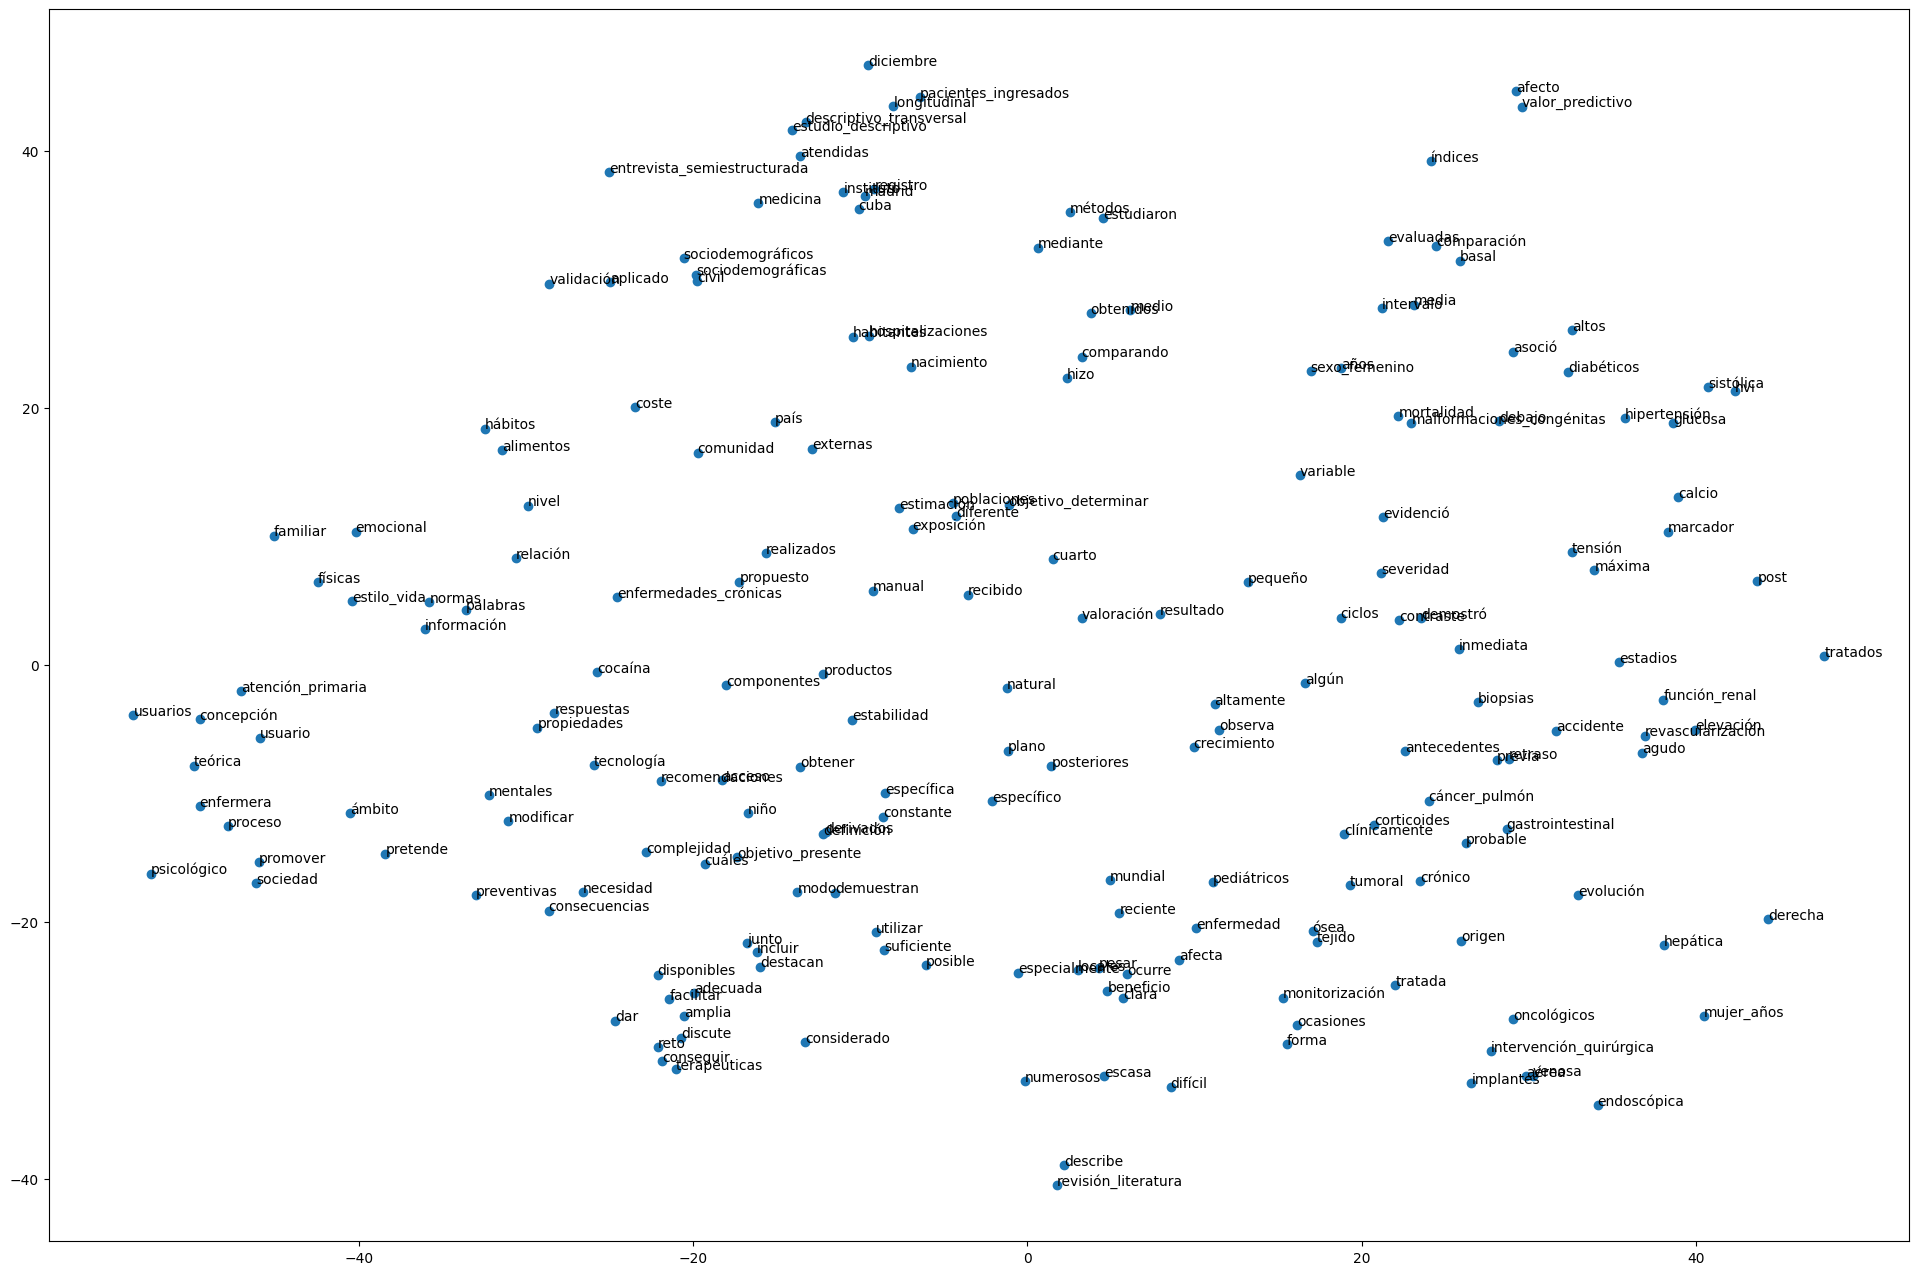

In [ ]:
fig = plt.figure(figsize=(24,16))

ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_2['x'], df_2['y'])

for word, pos in df_2.iterrows():
    ax.annotate(word, pos)
